# Simple Linear Regression

<a name="4"></a>
## Concept

In this practice lab, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (YearsExperience) to `y` (Salary) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

## 2 -  Problem Statement

Suppose you are the Manager of a Small firm and are considering hiring new recruitments.
- You would like to hire best possible candidate based on experience and determine the salary for the candidate.
- The firm already has few employees with varying job experience, and the Manager has salatry data for those employees.
    
Can you use the data to select the best candidates?

## Importing the libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# %matplotlib notebook

## Importing the dataset

In [21]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [22]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [23]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X1_train, X1_test, y1_train, y1_test = X_train, X_test, y_train, y_test

## Training the Simple Linear Regression model on the Training set

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [26]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

Text(0.5, 1.0, 'Salary vs Experience (Training set)')

Text(0.5, 0, 'Years of Experience')

Text(0, 0.5, 'Salary')

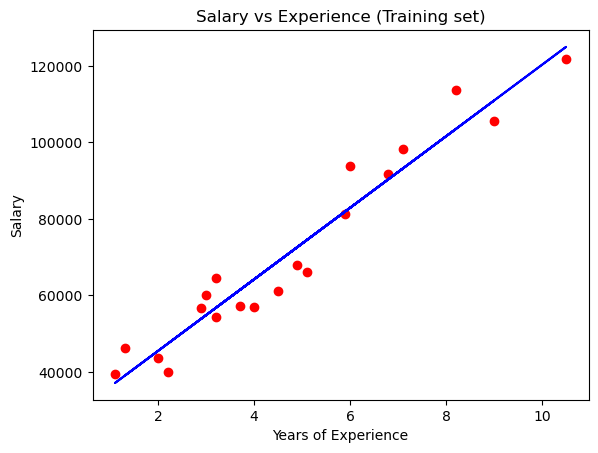

In [27]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

Text(0.5, 1.0, 'Salary vs Experience (Test set)')

Text(0.5, 0, 'Years of Experience')

Text(0, 0.5, 'Salary')

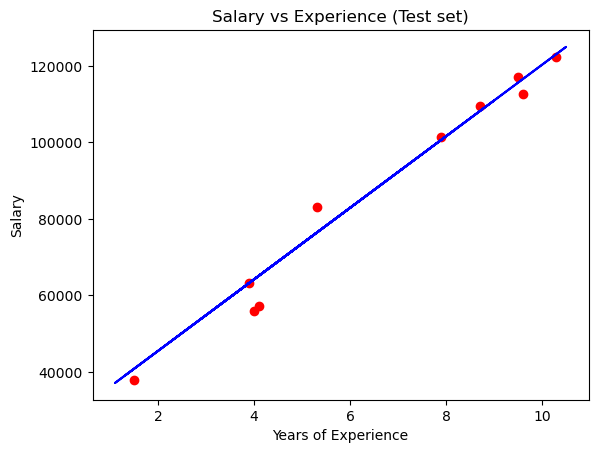

In [28]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## To test the Gradient descent method of scikit-learn linear model 

In [29]:
from sklearn.linear_model import SGDRegressor
clf_ = SGDRegressor()
clf_.fit(X1_train, y1_train)

print(f"number of iterations completed: {clf_.n_iter_}, number of weight updates: {clf_.t_}")

SGDRegressor()

number of iterations completed: 135, number of weight updates: 2701.0


model parameters:                   w: [10695.17370918], b:[18736.45751357]


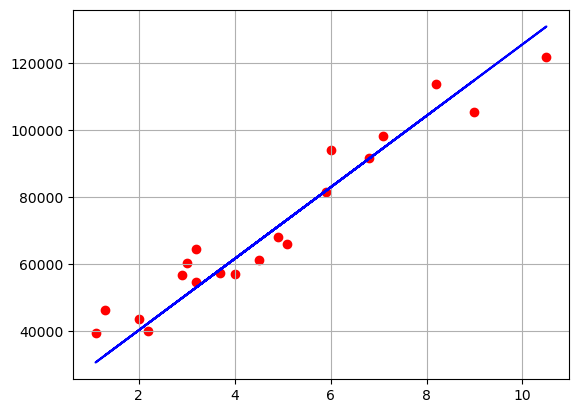

In [31]:
plt.grid()
plt.scatter(X1_train,y1_train, c='r')
plt.plot(X1_train,clf_.predict(X1_train), c='b')

### View parameters
The parameters are associated with the input training data. We have also manually calculated the prediction data and compared with the module given data.

In [59]:
b_norm = clf_.intercept_
w_norm = clf_.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
y1_pred_ana = np.dot(X1_test, w_norm) + b_norm

y1_pred = clf_.predict(X1_test)

print(f"prediction using np.dot() and sgdr.predict match: {(y1_pred == y1_pred_ana).all()}")

model parameters:                   w: [10695.17370918], b:[18736.45751357]
prediction using np.dot() and sgdr.predict match: True


Text(0.5, 1.0, 'Salary vs Experience (Training set)')

Text(0.5, 0, 'Years of Experience')

Text(0, 0.5, 'Salary')

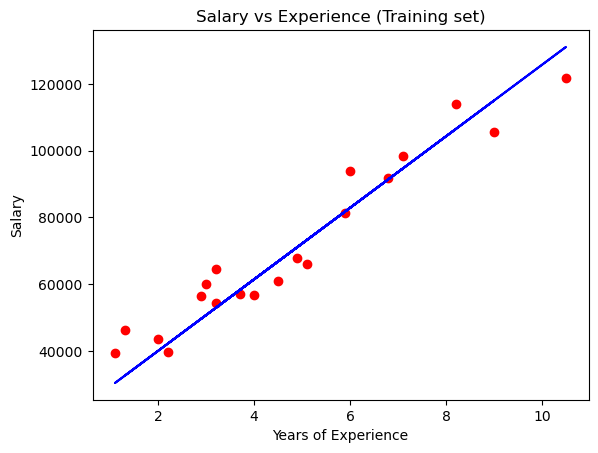

In [33]:
plt.scatter(X1_train, y1_train, color = 'red')
plt.plot(X1_train, clf_.predict(X1_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Text(0.5, 1.0, 'Salary vs Experience (Test set)')

Text(0.5, 0, 'Years of Experience')

Text(0, 0.5, 'Salary')

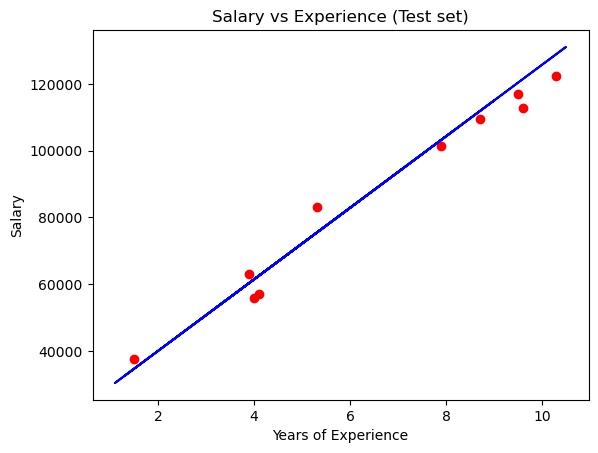

In [34]:
plt.scatter(X1_test, y1_test, color = 'red')
plt.plot(X1_train, clf_.predict(X1_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()